In [1]:
from fastai.vision import *

In [2]:
mnist = untar_data(URLs.MNIST_TINY)
tfms = get_transforms(do_flip=False)

In [3]:
data = (ImageList.from_folder(mnist)
        .split_by_folder()          
        .label_from_folder()
        .transform(tfms, size=32)
        .databunch()
        .normalize(imagenet_stats))

因為訓練出現問題, 所以這樣子設了, 可是還是出現問題 (也許不是這樣設?)

In [5]:
data.num_workers=0

In [6]:
data.num_workers

0

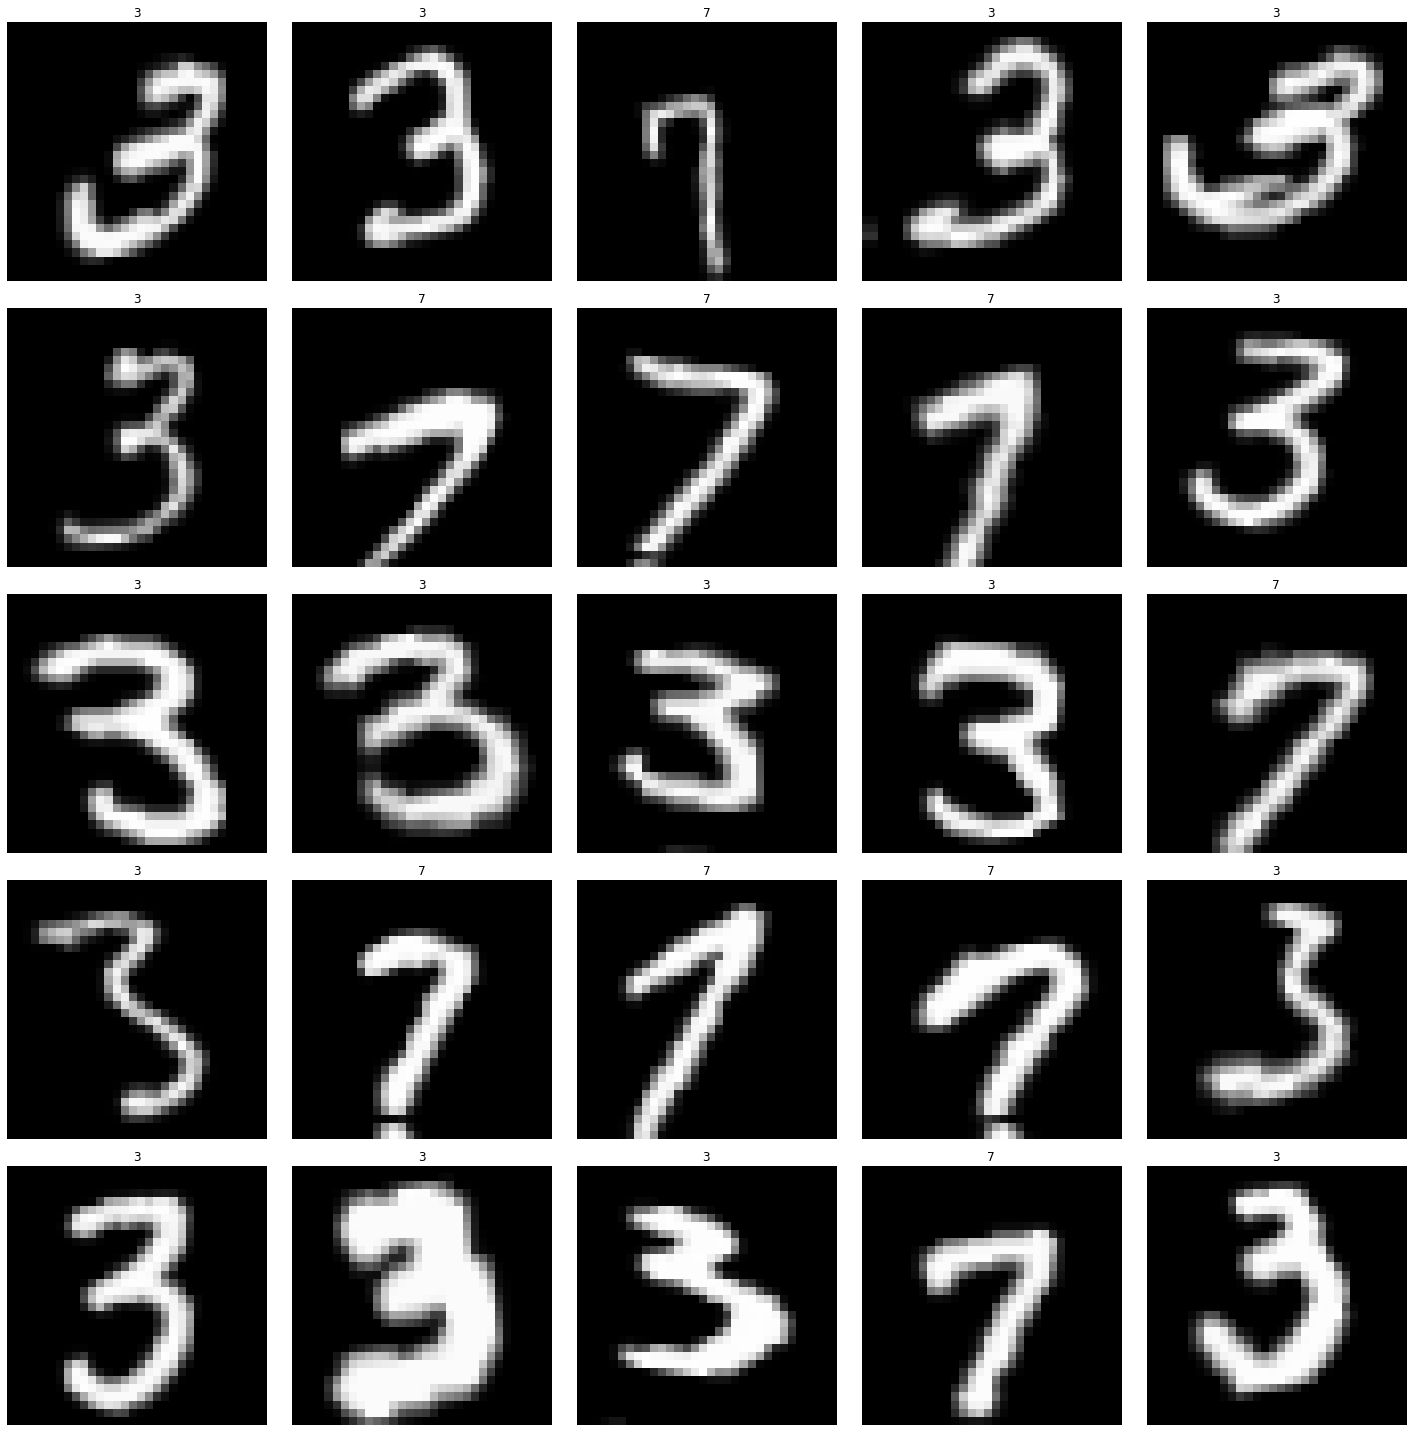

In [7]:
data.show_batch()

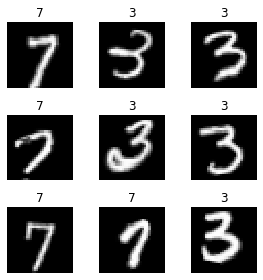

In [8]:
data.show_batch(rows=3, figsize=(4,4))

然後就可以開始建神經網路!

In [9]:
model = cnn_learner(data, models.resnet18, metrics=accuracy)

如果第一次使用, 要花點時間下載 ResNet18 的權重等資料。

In [10]:
model.fit_one_cycle(1,1e-2)

epoch,train_loss,valid_loss,accuracy,time


RuntimeError: DataLoader worker (pid 78150) is killed by signal: Unknown signal: 0. 